
# TASK 1 : ANALYSIS OF CDR's Milan


In [6]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import sys
import datetime
from datetime import datetime as dt
import pytz

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

'''
Reading files from 1st November to 10th November
Then will append every dataframe to get one file
'''
df_nov_1 = pd.DataFrame({})
for i in range(1,10):
    df = pd.read_csv('/content/drive/MyDrive/CDR_Nov/sms-call-internet-mi-2013-11-0{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_nov_1=df_nov_1.append(df)


In [9]:
'''
Reading the datafiles from 11th to 20th November
'''
for i in range(0,10):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_Nov/sms-call-internet-mi-2013-11-1{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_nov_1=df_nov_1.append(df1)


In [10]:
'''
Reading the datafiles from 21st Nov to 30th Nov
'''

for i in range(0,10):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_Nov/sms-call-internet-mi-2013-11-2{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_nov_1=df_nov_1.append(df1)


In [11]:
'''
For the last day of November
'''
for i in range(0,1):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_Nov/sms-call-internet-mi-2013-11-3{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_nov_1=df_nov_1.append(df1)


In [12]:
#Converting datetime to CET for further Analysis
#Merging Columns Smsin with smsout to get a new column sms, same is done with calls.
df_nov_1['datetime'] = pd.to_datetime(df_nov_1.datetime, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)
df_nov_1['sms'] = df_nov_1['smsin'] + df_nov_1['smsout']
df_nov_1['calls']=df_nov_1['callin']+df_nov_1['callout']
'''
Dropping columns after merging
'''
df_nov_1.drop(columns=['smsin', 'smsout','callin','callout'])
#Grouping by Datetime and Square Id
df_nov_1 = df_nov_1[['datetime', 'squareid', 'internet', 'sms', 'calls']].groupby(['datetime', 'squareid'], as_index=False).sum()
'''
Filling Na/Nan values with 0 for analyzing purposes
'''
df_nov_1.fillna(0)


,datetime,squareid,internet,sms,calls
0,2013-11-01 00:00:00,1,11.028366,0.298651,0.213213
1,2013-11-01 00:00:00,2,11.058225,0.286884,0.219658
2,2013-11-01 00:00:00,3,11.090008,0.274357,0.226519
3,2013-11-01 00:00:00,4,10.941881,0.332737,0.194543
4,2013-11-01 00:00:00,5,9.916548,0.308428,0.182593
...,...,...,...,...,...
43197234,2013-11-30 23:50:00,9996,49.033773,1.151035,0.393033
43197235,2013-11-30 23:50:00,9997,52.324263,1.103091,0.667053
43197236,2013-11-30 23:50:00,9998,51.784279,1.116809,0.612416
43197237,2013-11-30 23:50:00,9999,32.465446,1.119839,0.320794


# Analyzing CDR in a geo-location for the month of November'2013

In [31]:
df_nov_1.head(5)

,datetime,squareid,internet,sms,calls
0,2013-11-01,1,11.028366,0.298651,0.213213
1,2013-11-01,2,11.058225,0.286884,0.219658
2,2013-11-01,3,11.090008,0.274357,0.226519
3,2013-11-01,4,10.941881,0.332737,0.194543
4,2013-11-01,5,9.916548,0.308428,0.182593


In [32]:
df_nov_1.tail()

,datetime,squareid,internet,sms,calls
43197234,2013-11-30 23:50:00,9996,49.033773,1.151035,0.393033
43197235,2013-11-30 23:50:00,9997,52.324263,1.103091,0.667053
43197236,2013-11-30 23:50:00,9998,51.784279,1.116809,0.612416
43197237,2013-11-30 23:50:00,9999,32.465446,1.119839,0.320794
43197238,2013-11-30 23:50:00,10000,22.186163,1.059179,0.665179


In [15]:
'''
Checking if there are any null values before goinh further with the analysis
'''
df_nov_1.isnull().sum()

datetime    0
squareid    0
internet    0
sms         0
calls       0
dtype: int64

In [16]:
df_nov_1['internet'].describe()

count    4.319724e+07
mean     6.904812e+01
std      1.344187e+02
min      0.000000e+00
25%      1.166373e+01
50%      2.927390e+01
75%      6.849465e+01
max      8.044071e+03
Name: internet, dtype: float64

In [18]:
import seaborn as sns
import plotly.express as px

<Axes: xlabel='internet'>

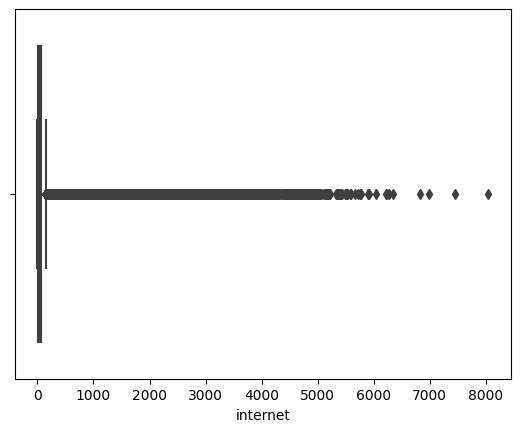

In [19]:
'''
Generally, if we have a single data column(internet) and you want to check for outliers
within that column, you can place the data on the y-axis.
 This way, you can easily visualize the distribution of your data and identify any outliers.
'''

sns.boxplot(x=df_nov_1['internet'])

 There are some outlier in the data coloumn for internet, not a good idea to remove them as they might be from area with highest activity.


In [20]:
fig=px.histogram(df_nov_1,x='internet')
fig.show()

We can see from the boxplot and the histogram that there are outliers present in the data. As having a data that follows normal distribution, Z-score it used to calculate the outliers. But since our data is skewed we should not use Z-score. Instead we can find Inter-Quartile ranges for our data.

#  Using IQR(Statistical Method) to calculate Outliers

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

In [ ]:

    Q1=df_nov_1.quantile(0.25)
    Q3=df_nov_1.quantile(0.75)
    IQR=Q3-Q1
    outliers= df_nov_1[((df_nov_1<(Q1-1.5*IQR)) | (df_nov_1>(Q3+1.5*IQR)))]
    print(outliers)

TypeError: Invalid comparison between dtype=datetime64[ns] and ndarray


Since date time is a floating ndarray, it is causing an exception. Also figuring it from the box plot and histogram
it might not be the best case to remove outliers as they might be from peak traffic areas. It need be we can drop
it later.


In [21]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

Checking correlation between variables in the dataframe.
Correlation is used to analyze the strength and direction between two quantitative variables.
It is denoted by r and values between -1 and +1. A positive value for r indicates a positive association and a
negative value for r indicates a negative association.

In [22]:
'''
Using python corr() method to find it.''

Arguments:corr(method='pearson/kendall', min_periods=1, numeric_only=False)

min_periods->int type minimum number of observations required per pair of columns in a dataframe

numeric_onlu->Bool type default False
'''

corr_cdr_nov=df_nov_1.corr()

corr_cdr_nov.style.background_gradient(cmap = 'magma')


,squareid,internet,sms,calls
squareid,1.000000,0.134764,0.105829,0.111463
internet,0.134764,1.000000,0.869395,0.840790
sms,0.105829,0.869395,1.000000,0.902141
calls,0.111463,0.840790,0.902141,1.000000


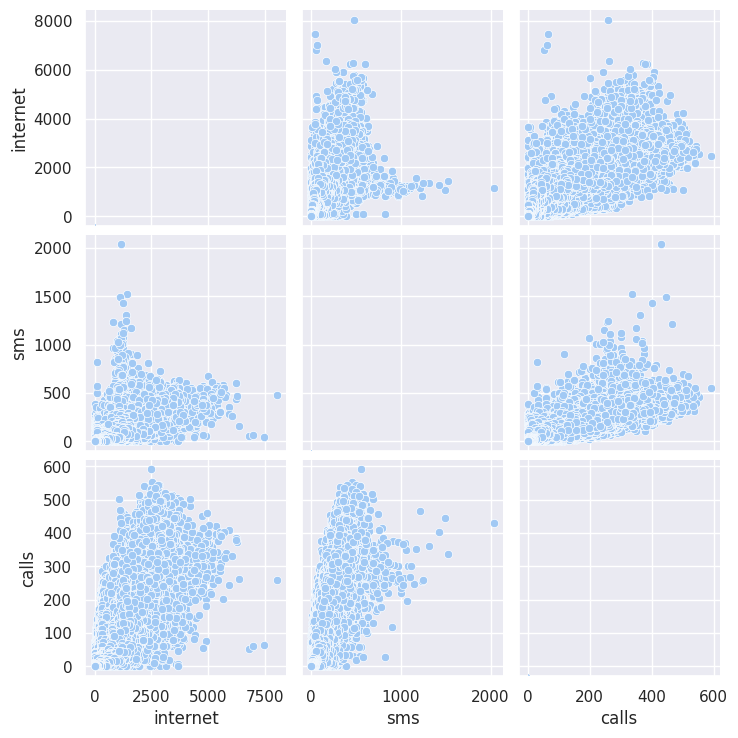

In [23]:
sns.set()
sns.set_palette("pastel")
columns = ['internet', 'sms', 'calls']
sns.pairplot(df_nov_1[columns], size = 2.5)
plt.show();


High positive correlation between sms, calls and internet.
Focusing on internet traffic for this analysis


In [24]:
import scipy
from scipy import stats

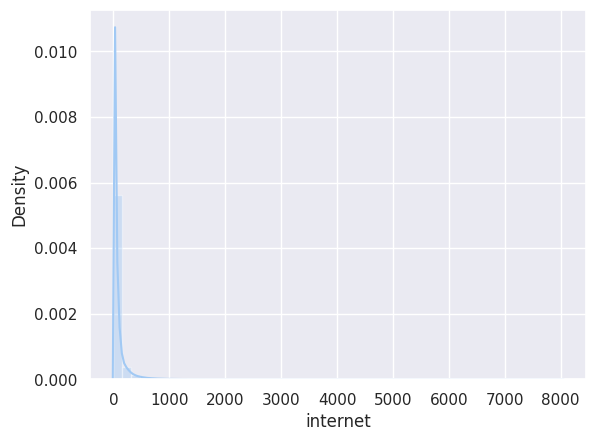

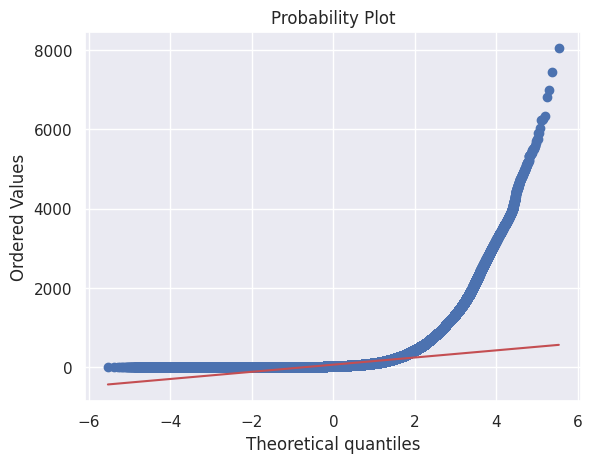

In [25]:
'''
Plotting histogram and probability plot of  internet traffic.
'''
fig = plt.figure()
ax = fig.gca()
sns.distplot(df_nov_1['internet'])
plt.show()

#Probability plot
fig = plt.figure()
res = stats.probplot(df_nov_1['internet'], plot=plt)

We can see from the histogram clearly that our data is right skewed. Now we will try to find the actual value of the skewness; which is important to know the asymmetrical behaviour of the data rather than doing a frequency distribution.
- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.

In [26]:
#Finding Skewness

scipy.stats.skew(df_nov_1['internet'])



6.772338470833069

We already knew that our data distribution was asymmetrical. Now we know that it has a long right tail, meaning it is right skewed.

<b>Checking Area with Highest Traffic<b>

In [27]:
#Returning rows in descending order based on peak values
df_peaktraffic_nov=df_nov_1.nlargest(10,['internet'])

In [28]:
df_peaktraffic_nov['day_of_week'] = df_peaktraffic_nov['datetime'].dt.day_name()

In [29]:
df_peaktraffic_nov

,datetime,squareid,internet,sms,calls,day_of_week
2275128,2013-11-02 13:50:00,5161,8044.070569,476.639269,259.431890,Saturday
17886086,2013-11-13 10:00:00,6370,7442.471002,45.508341,64.167040,Wednesday
18116086,2013-11-13 13:50:00,6370,6989.709890,61.579019,60.870517,Wednesday
18076086,2013-11-13 13:10:00,6370,6818.013514,53.984772,52.427096,Wednesday
42732528,2013-11-30 16:10:00,5161,6347.693271,163.896824,262.308786,Saturday
42782518,2013-11-30 17:00:00,5161,6270.257851,470.030809,372.191599,Saturday
42792516,2013-11-30 17:10:00,5161,6237.587382,599.823881,378.255114,Saturday
42752524,2013-11-30 16:30:00,5161,6227.594153,435.751748,384.958701,Saturday
42812512,2013-11-30 17:30:00,5161,6032.754721,267.095720,329.937687,Saturday
31214526,2013-11-22 16:10:00,5061,5919.133975,280.888987,243.350512,Friday


<b>Few Observations<b>
    
- Squareid 5161 is the most populated area so therefore it can be said that it is the centre of Milan.
- We can also see that we are getting peak traffic for mostly weekends which is expected.

A figure showing the distribution (Probability Density Function) of the total traffic
recorded in a geographical area (for November).
- Probability Density is done basically to find the weighted average of neighbours for kernel smoothing.
- In statistics, PDF is needed to make inferences about the population.To know more, access the link below.
- https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='internet', ylabel='Density'>

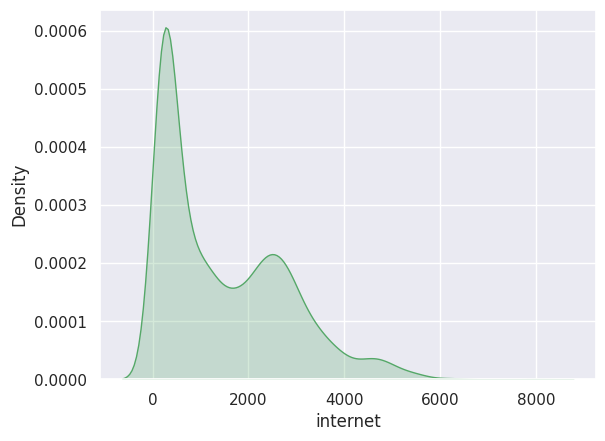

In [30]:
#Density Distribution for Square'id 5161.
sns.kdeplot(df_nov_1.loc[(df_nov_1['squareid']==5161),
            'internet'], color='g', shade=True)

References :


1.https://en.wikipedia.org/wiki
2.https://www.geeksforgeeks.org/python-data-analysis-using-pandas/
3.https://github.com/Aujasvi-Moudgil/Forecasting-Mobile-Network-Traffic



